# Classification challenge


This Jupyter notebook consists of the data cleaning, data vizualisation and model implementation for the following Data Challenge : [Forest cover type](https://www.kaggle.com/competitions/forest-cover-type-orsay/overview)

The goal of this challenge is the prediction of the vegetation type of a forest based on various metrics : Elevation, Aspect, Hillshade ...


## Libraries


In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

## Loading Data


In [2]:
# URL du dépôt GitHub
repo_url = 'https://github.com/JorisCaudard/M2_Data_Challenge.git'
repo_name = 'M2-Data_challenge'

In [3]:
DATA_FOLDER = "../Data/Classification"

TRAIN_FILE_NAME = "train.csv"
TEST_FILE_NAME = "test.csv"
NAIVE_SUBMISSION_FILE_NAME = "naive_submission.csv"
SUBMISSION_FILE_NAME = "submission"

In [4]:
dfTrain = pd.read_csv(os.path.join(DATA_FOLDER, TRAIN_FILE_NAME), index_col=[0])
dfTest = pd.read_csv(os.path.join(DATA_FOLDER, TEST_FILE_NAME), index_col=[0])
dfSubmission = pd.read_csv(os.path.join(DATA_FOLDER, NAIVE_SUBMISSION_FILE_NAME), index_col=[0])

## Data Exploration


First step of this notebook is a bit of Data exploration ; understanding the data and cleaning it if necessary can give us some insights into what we need to predict and how we'll do it


### Naive data exploration


Let's first look at the datasets we will manipulate


In [5]:
dfTrain.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2909,28,18,182,58,1350,210,197,117,2160,...,0,0,0,0,0,0,0,0,0,2
1,2757,334,30,212,83,1384,137,184,177,1570,...,0,0,0,0,0,0,0,0,0,2
2,3283,248,4,150,15,5601,211,243,170,892,...,0,0,0,0,0,0,1,0,0,1
3,3019,330,14,541,-101,1811,186,222,175,2154,...,0,0,0,0,0,0,0,0,0,2
4,3039,340,20,474,74,3407,175,207,169,1879,...,0,0,0,0,0,0,0,1,0,1


In [6]:
dfTrain.isnull().sum() ##No missing cell data

Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0
Soil_Type11                           0


In [7]:
pd.set_option("display.max_columns", None) # See all columns
dfTrain.describe(include='all')

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,2959.215150,155.551260,14.122850,269.605630,46.821590,2350.361130,212.103800,223.348670,142.585660,1976.436530,0.448040,0.051140,0.436230,0.064590,0.005220,0.013070,0.008570,0.021020,0.002720,0.01104,0.000160,0.00036,0.002050,0.056270,0.021700,0.052020,0.030760,0.001090,0.0,0.004810,0.005870,0.003270,0.00672,0.015950,0.001500,0.056840,0.098920,0.036040,0.000770,0.003920,0.001890,0.001330,0.196620,0.052150,0.043850,0.090250,0.079220,0.002800,0.003080,0.000200,0.000570,0.027890,0.024050,0.015440,2.054180
std,280.832825,111.759698,7.507368,212.770595,58.689319,1560.499103,26.841126,19.756411,38.459542,1324.925172,0.497295,0.220284,0.495919,0.245802,0.072061,0.113575,0.092177,0.143452,0.052083,0.10449,0.012648,0.01897,0.045231,0.230444,0.145703,0.222068,0.172668,0.032997,0.0,0.069188,0.076391,0.057091,0.08170,0.125283,0.038701,0.231538,0.298556,0.186391,0.027738,0.062487,0.043433,0.036445,0.397445,0.222331,0.204762,0.286541,0.270083,0.052841,0.055412,0.014141,0.023868,0.164658,0.153205,0.123295,1.398794
min,1860.000000,0.000000,0.000000,0.000000,-161.000000,0.000000,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,59.000000,9.000000,108.000000,7.000000,1103.000000,198.000000,213.000000,119.000000,1020.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1992.000000,218.000000,226.000000,143.000000,1704.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000

In [8]:
wilderness_columns = dfTrain[[f"Wilderness_Area{i}" for i in range(1,5)]]

if (wilderness_columns.sum(axis=1) > 1).any():
    print("The columns are not mutually exclusive.")
else:
    print("The columns are mutually exclusive.")


if 0 in wilderness_columns.sum(axis=1):
    print("There are rows with all zeros in the one-hot encoded columns.")
else:
    print("No rows with all zeros were found in the one-hot encoded columns.")

The columns are mutually exclusive.
There are rows with all zeros in the one-hot encoded columns.


In [9]:
soil_type_columns = dfTrain[[f"Soil_Type{i}" for i in range(1, 41)]]

if (soil_type_columns.sum(axis=1) > 1).any():
    print("The columns are not mutually exclusive.")
else:
    print("The columns are mutually exclusive.")

if 0 in soil_type_columns.sum(axis=1):
    print("There are rows with all zeros in the one-hot encoded columns.")
else:
    print("No rows with all zeros were found in the one-hot encoded columns.")

The columns are mutually exclusive.
There are rows with all zeros in the one-hot encoded columns.


We can see a few different things from this table :

- No data is missing from the dataset, which is a good thing ;
- The Elevation and various distance columns are all float type, since they represent distance in meters ;
- Since we have vertical and horizontal distance to Hydrology, we could combine them into a single distance column. However, we'll lose the sign of vertical distance, and therefore lose some information. For now, we will keep them as is ;
- Aspect and Slope are also quantitative columns, representing degreees (hence why Aspect goes from 0 to 360) ;
- The various Hillshade columns are int type indexes, but can be treated as quantitative ;
- All Wilderness_Area and Soil_Type columns seem to be One-hot encoded qualitative variables (Binary values, mutually exclusive). The fact that we can found row with all 0 seems to indicate that a column was dropped during encoding ;
- Target variable is already encoded as int64 type.

Overall, the dataset does not seem to necessitate further cleaning.


### Correlation Matrix


To better determine important features, we can first look at the correlation matrix. We'll separate the matrix by "types" of variable to better see the correlation with our target.


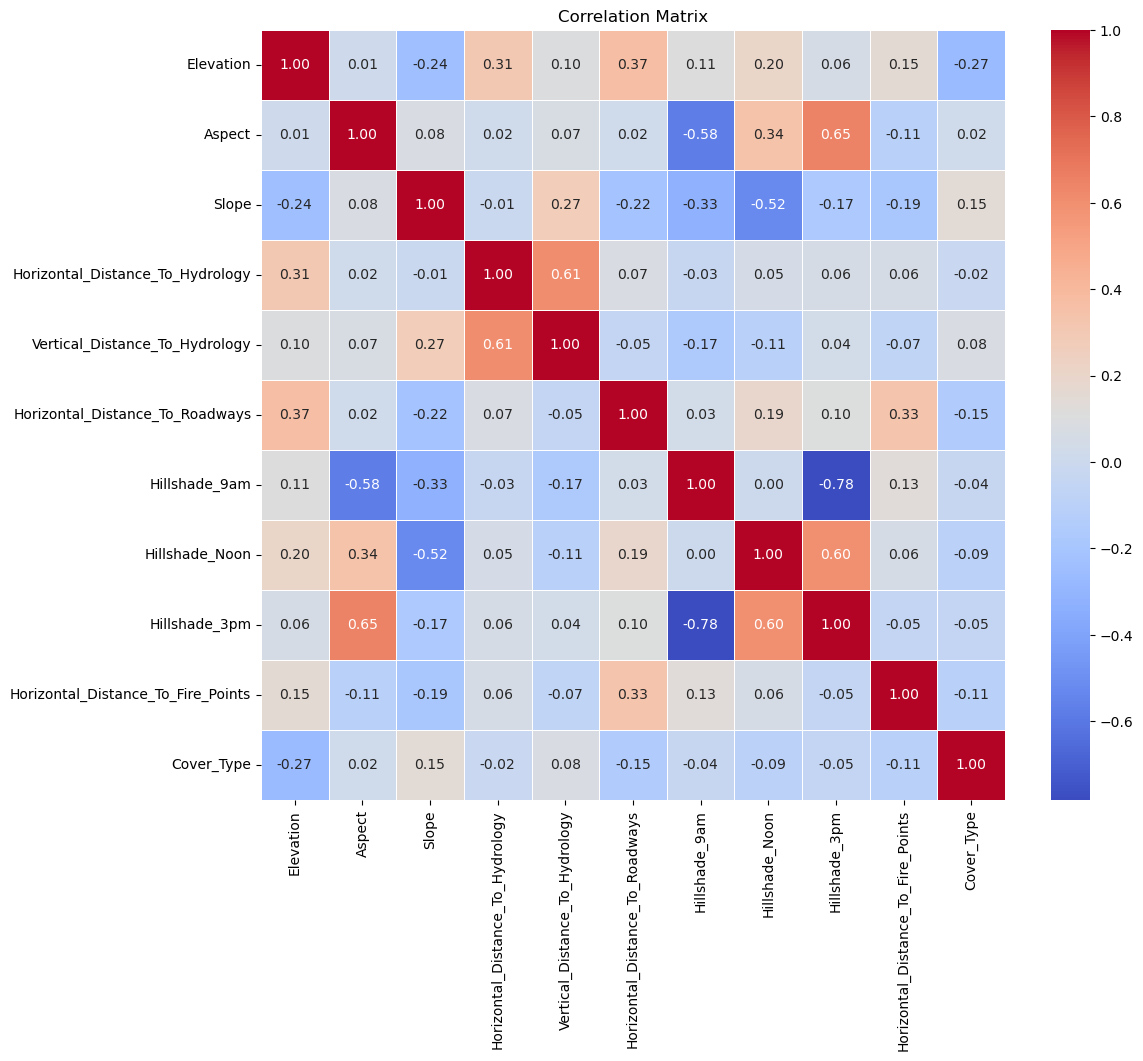

In [10]:
# Just considering numerical columns
dfTrain_numeric = dfTrain.drop(columns=wilderness_columns.columns)
dfTrain_numeric = dfTrain_numeric.drop(columns=soil_type_columns.columns)

# Calculate the correlation matrix
corr_matrix = dfTrain_numeric.corr()

# Plotting the correlation matrix using a Seaborn heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

The most correlated variable are found within the Hillshade subset, which is not really surprising. Our target variable seem to be mostly correlated with elevation, sloap and distance to roadways


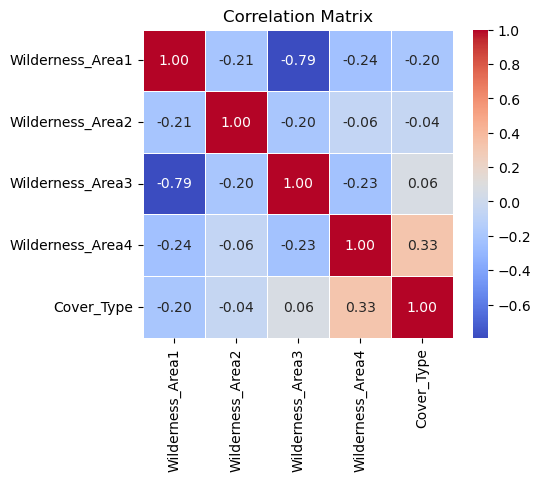

In [11]:
# Just considering Wilderness_Area columns
dfTrain_wilderness = wilderness_columns.join(dfTrain['Cover_Type'])

# Calculate the correlation matrix
corr_matrix = dfTrain_wilderness.corr()

# Plotting the correlation matrix using a Seaborn heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

Here we can see a strong correlation between Cover_Type and Wilderness_Area4.


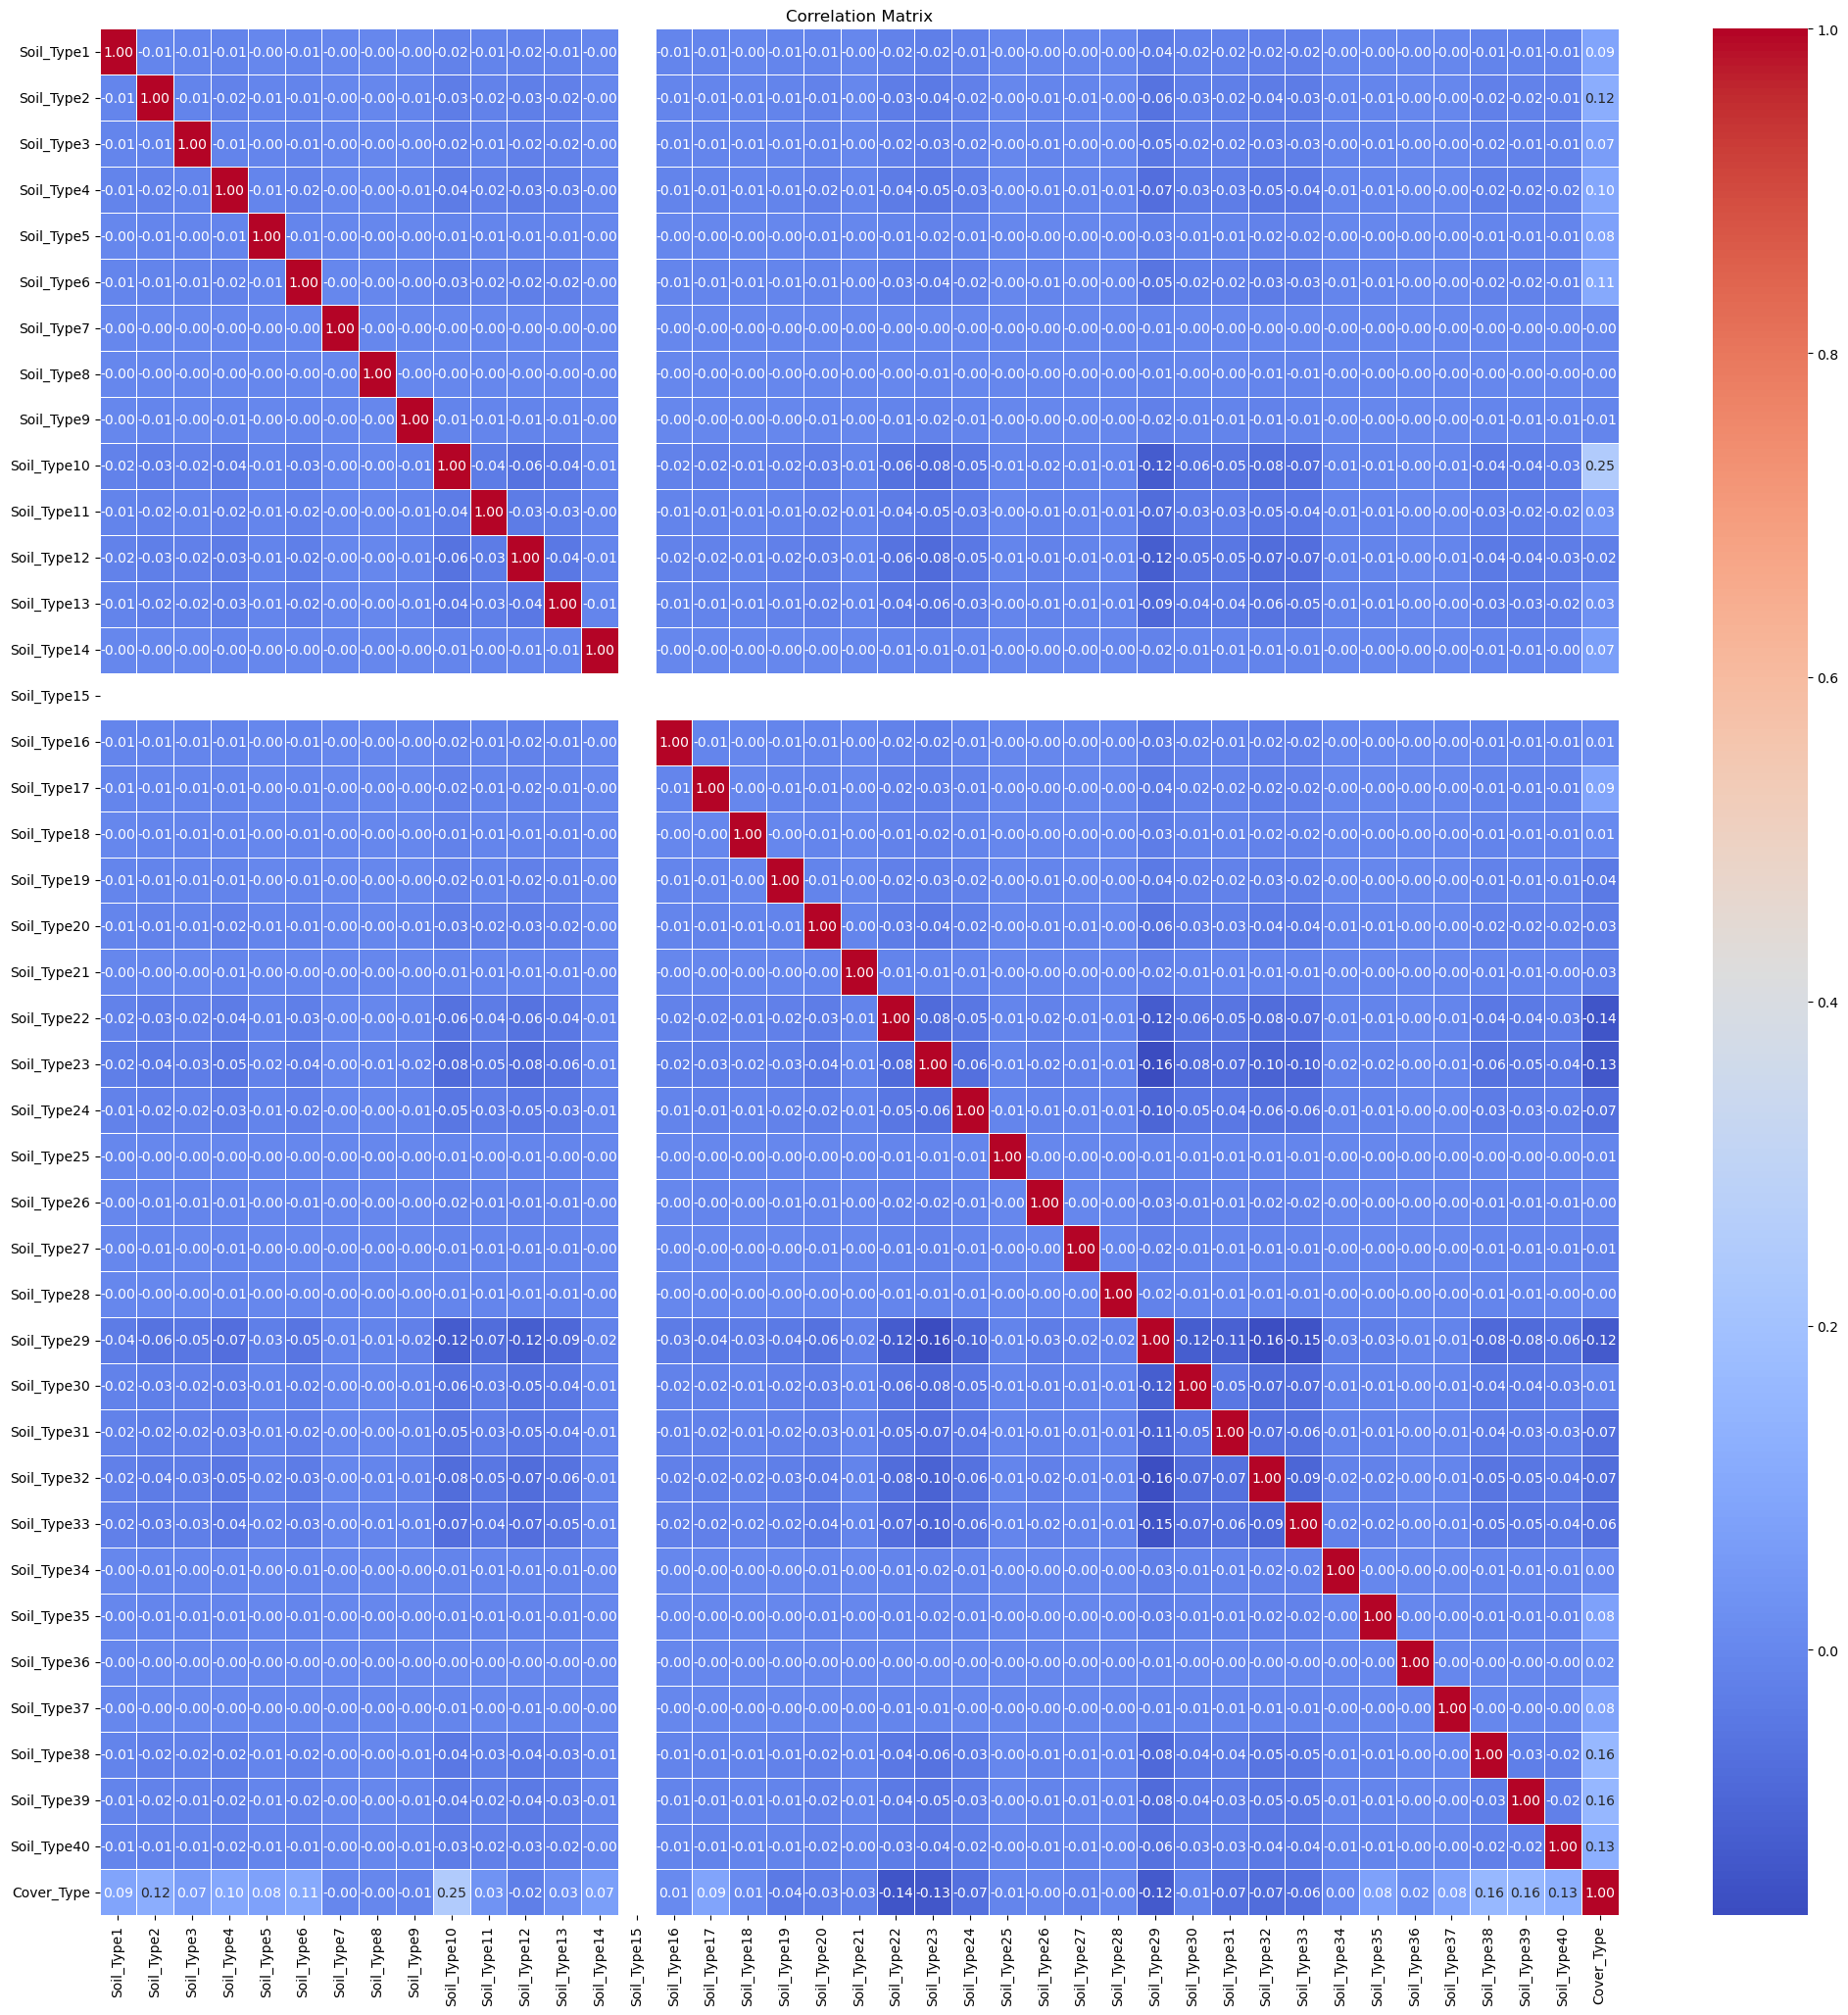

In [12]:
# Just considering Soil_Type columns
dfTrain_soil_type = soil_type_columns.join(dfTrain['Cover_Type'])

# Calculate the correlation matrix
corr_matrix = dfTrain_soil_type.corr()

# Plotting the correlation matrix using a Seaborn heatmap
plt.figure(figsize=(25, 25))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

We can see some correlation between our target and some Soil_Types, but nothing really significant.


### Feature importance


However, looking at correlation for a categorical variable is not really a great fit. To better understand which variable are important, we can look at feature importance after fitting a classificaiton model.

We will use a Random Forest model fitted on the entire dataset, and then look at the feaure importance to identify prominent features.


In [13]:
from sklearn.ensemble import RandomForestClassifier

X = dfTrain.drop('Cover_Type', axis=1)  # Features
y = dfTrain['Cover_Type']  # Target variable

model = RandomForestClassifier()
model.fit(X, y)

# Get feature importances
importances = model.feature_importances_

# Create a DataFrame for the feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

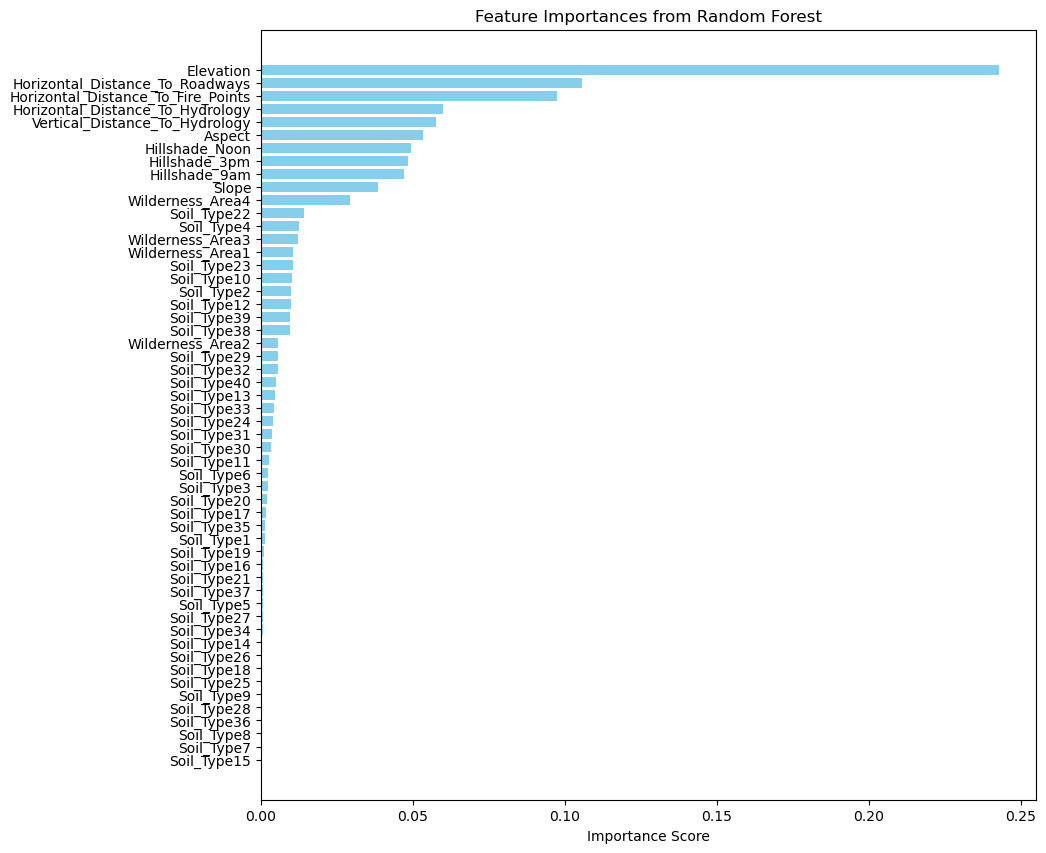

In [14]:
plt.figure(figsize=(10, 10))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance Score')
plt.title('Feature Importances from Random Forest')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important features on top
plt.show()


We can confirm here our intuitions ; The most important feaures seem to be Elevation, Distance to Roadways and Hydrology. We can also see that most SOil_Types doesn't seem to have much importance score here.


### Histograms


We can look at the distribution of some variable of interest


In [15]:
# First, we will reconstruct the Wilderness_Area and Soil_Type columns
dfBase = dfTrain.copy()
dfBase['Wilderness_Area'] = np.argmax(wilderness_columns.values, axis=1)
dfBase['Soil_Type'] = np.argmax(soil_type_columns.values, axis=1)

dfBase.drop(columns=wilderness_columns.columns, inplace=True)
dfBase.drop(columns=soil_type_columns.columns, inplace=True)

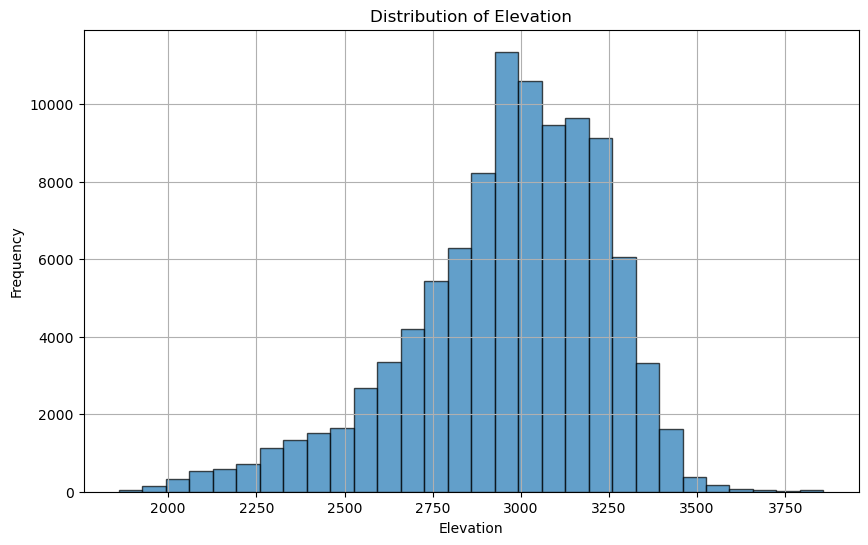

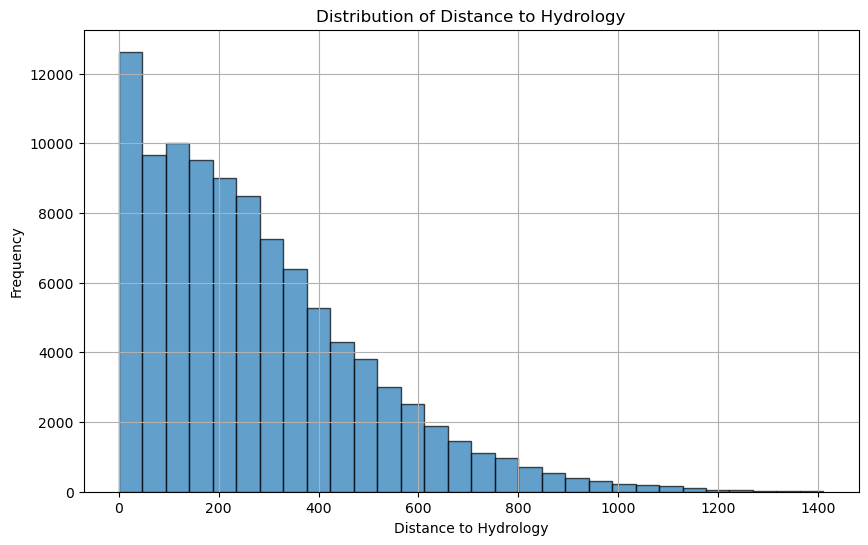

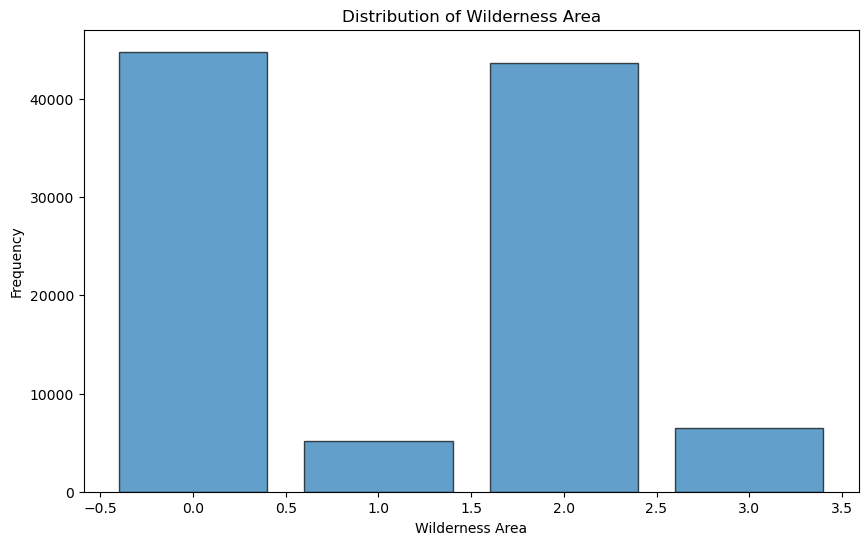

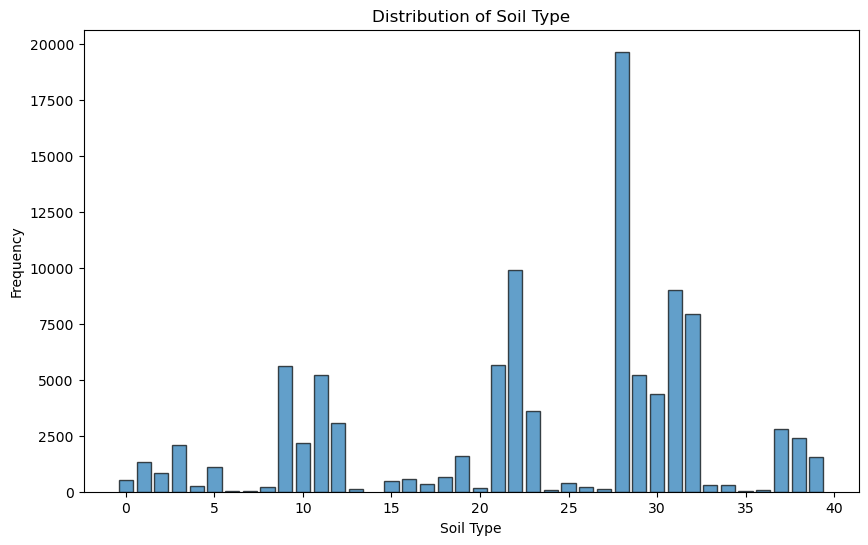

In [16]:
# Plotting Elevation
plt.figure(figsize=(10, 6))
plt.hist(dfBase['Elevation'], bins=30, edgecolor='k', alpha=0.7)
plt.title('Distribution of Elevation')
plt.xlabel('Elevation')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Plotting Distance to Hydrology
plt.figure(figsize=(10, 6))
plt.hist(np.sqrt(dfBase['Horizontal_Distance_To_Hydrology']**2 + dfBase['Vertical_Distance_To_Hydrology']**2), bins=30, edgecolor='k', alpha=0.7)
plt.title('Distribution of Distance to Hydrology')
plt.xlabel('Distance to Hydrology')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Plotting Wilderness Area
plt.figure(figsize=(10, 6))
plt.bar(dfBase['Wilderness_Area'].value_counts().index, dfBase['Wilderness_Area'].value_counts().values, edgecolor='k', alpha=0.7)
plt.title('Distribution of Wilderness Area')
plt.xlabel('Wilderness Area')
plt.ylabel('Frequency')
plt.show()

# Plotting Soil Type
plt.figure(figsize=(10, 6))
plt.bar(dfBase['Soil_Type'].value_counts().index, dfBase['Soil_Type'].value_counts().values, edgecolor='k', alpha=0.7)
plt.title('Distribution of Soil Type')
plt.xlabel('Soil Type')
plt.ylabel('Frequency')
plt.show()

We can see a few things from these graphs :

- Elevation seems to follow a normal distribution ;
- Distance seems to follow an exponential distribution ;
- Some Wilderness Type or Soil Type are overly represented in the dataframe compared to others.


### Data PCA


Before implementing those models, we can look at PCA : Reducing the dimension of the dataset could improve the future models.


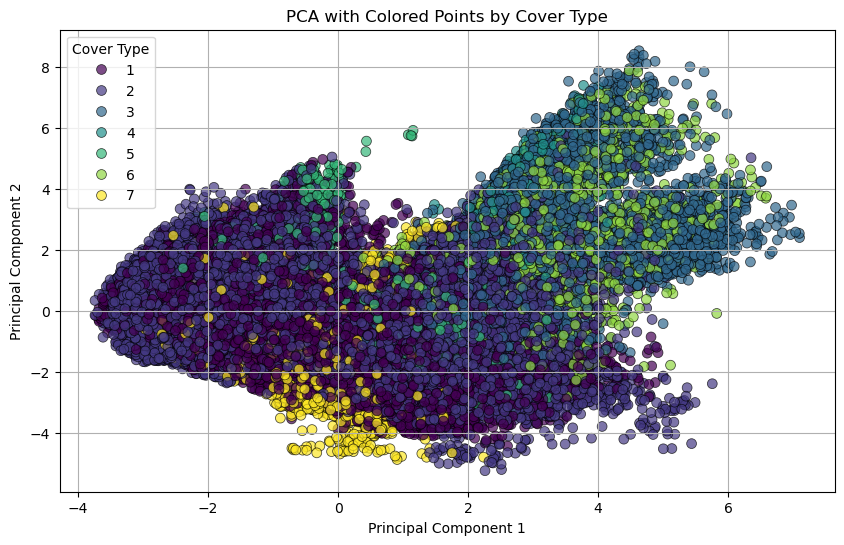

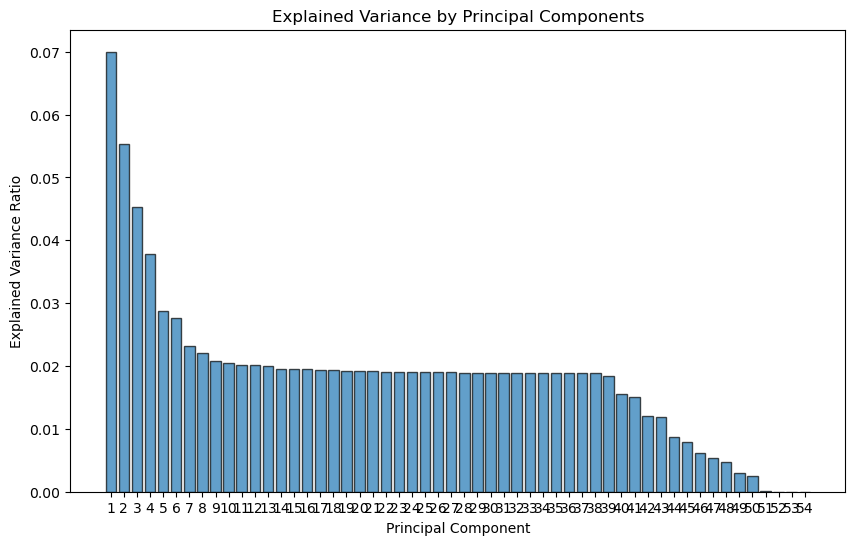

In [17]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(dfTrain.drop(columns=['Cover_Type']))

# Applying PCA
pca = PCA()
principal_components = pca.fit_transform(X_train_scaled)

# Creating a DataFrame with the principal components
pca_df = pd.DataFrame(data=principal_components, columns=[f'Principal Component {i+1}' for i in range(principal_components.shape[1])])

# Plotting the PCA results for the first two components
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Principal Component 1', y='Principal Component 2', hue=dfTrain['Cover_Type'], data=pca_df, palette='viridis', s=50, alpha=0.7, edgecolor='k')
plt.title('PCA with Colored Points by Cover Type')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.legend(title='Cover Type')
plt.show()

# Plotting the explained variance
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, alpha=0.7, edgecolor='k')
plt.title('Explained Variance by Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.xticks(range(1, len(pca.explained_variance_ratio_) + 1))
plt.show()

With this PCA analysis, we cannot see a clear cutoff in explained variance, and we'll need at least 42 Principal ccomponents to explain 95% of the variance. We could use the first 8-10 principal components to reduce the dimension of the models, but I doubt it will yeld significant results.

However, displaying the first two components produce interesting results : We can quite clearly isolate the clusters corresponding to the Cover Type 7 (Krummholz) from the rest, as well as identifying a cluster containing the Cover Types 4, 5 and 6 (Cottonwood/Willow, Aspen and Douglas-fir respectively).


## Data cleaning


Based on this exploration, no further Data Cleaning should be necessary.


## Building Models


We'll implement all models as pipelines in a dictionnary, then train all models at the same time and evaluate the results based on a 5-fold cross-validation method, evaluating the R2 score


### Model libaries


In [18]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import cross_validate, RandomizedSearchCV, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.base import BaseEstimator
from sklearn.compose import ColumnTransformer

from xgboost import XGBClassifier

To fully use the Pipeline and dictionnary implement, we'll use custom class based on the BaseEstimator to creat custom models (Namely the basemodel, and the Hurdle models)/


In [19]:
class RandomPredictor(BaseEstimator):
    def __init__(self, strategy='random'):
        self.strategy = strategy
        self.labels = None
        self.proportions = None
        
    def fit(self, X, y):
        # Get labels
        self.labels = np.unique(y)

        # Get proportions
        if self.strategy=='proportional':
            self.proportions = np.bincount(y) / len(y)
        elif self.strategy=='random':
            self.proportions = np.ones(len(self.labels)) / len(self.labels)
        else:
            raise ValueError("Strategy must be either 'random' or 'proportional' !")
        
        return self

    def predict(self, X):
        # Predict values either at random or based on the distribution in the training data
        return np.random.choice(self.labels, size=len(X), p=self.proportions)


## Model dictionnary


Here, we'll implement all models in a single dictionnary. Each model will then be evaluated and compared to each other.


In [ ]:
modelDict = {
    'Random model': Pipeline([
        ('classifier', RandomPredictor(strategy='random'))
    ]),

    'Random model (proportional)': Pipeline([
        ('classifier', RandomPredictor(strategy='proportional'))
    ]),

    'Logistic Regression': Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', LogisticRegression(max_iter=250))
    ]),

    'KNN Classifier': Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', KNeighborsClassifier())
    ]),

    'Decision Tree Regression': Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', DecisionTreeClassifier())
    ]),

    'Random Forest Classifier': Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', RandomForestClassifier())
    ]),

    'SVC Classifier': Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', SVC())
    ]),

    'XGB Classifier': Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', XGBClassifier())
    ])
}

### Models Training


To evaluate the performance of each model, we will use the Cross-Validation method (with 5 folds). Each model will be traind on 80% of the Data, then evaluated on the remaining 20%. For each fold, we will compute the accuracy score and the F1-score adapted to the multiclass problem obtained on the test fold.

We'll compare various models :

-


In [ ]:
# Defining training data and training target
X = dfTrain.drop(columns=['Cover_Type'])
y = dfTrain['Cover_Type']

# Using label encoder to ensure stability (with XGBoost especially)
encoder = LabelEncoder()
y = encoder.fit_transform(y)

In [22]:
results = {}

for model_name, model_pipeline in modelDict.items():
    cv_results = cross_validate(model_pipeline, X, y, cv=5, scoring=['accuracy', 'f1_weighted'])
    print(f"Model : {model_name} achieved a mean accuracy score of {cv_results['test_accuracy'].mean():.2f} and a mean f1-score of {cv_results['test_f1_weighted'].mean():.2f}, model fitted in {cv_results['fit_time'].sum() + cv_results['score_time'].sum():.2f}s")
    results[model_name] = cv_results

Model : Random Forest Classifier achieved a mean accuracy score of 0.90 and a mean f1-score of 0.90, model fitted in 96.02s
Model : XGB Classifier achieved a mean accuracy score of 0.86 and a mean f1-score of 0.86, model fitted in 50.86s


We can see some relatively expected results :

-

We will then optimize hyperparameters using GridSearch on the best three models : XGBoost, Hurdle Model (Logistic Regression + Linear Regression), and Random Forest.


### Hyperparameters search


We'll first do a Randomized Search, to see if it's necessary to also use a more thorough Grid Search. Since Random Forest takes a long time to be fitted, we will not perform any parameter optimization on it (though code is written, feel free to try !)


In [ ]:
#TODO: Hyperparameters search for best performing models

xgb_param_grid = {
    'regressor__n_estimators': [50, 100, 200],       
    'regressor__max_depth': [3, 5, 7],              
    'regressor__learning_rate': [0.01, 0.1, 0.2],    
    'regressor__subsample': [0.6, 0.8, 1.0]          
}

random_forest_param_grid = {
    'regressor__n_estimators': [50, 100, 200, 300],
    'regressor__criterion': ['squared_error', 'absolute_error', 'friedman_mse', 'poisson'],
    'regressor__max_depth': [None, 10, 20, 30, 40],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4],
    'regressor__max_features': ['auto', 'sqrt', 'log2'],
    'regressor__bootstrap': [True, False]
}

The randomized search doesn't seem to have significantly improve the models. We'll no will keep the default parameters to make the finals predictions.


## Predictions on test set


We'll finally use the selectd model to make predictions on the test Dataset. We'll first train the models on all the training set, then make predictions on the test set. Finally, we'll save the results to submit them on the kaggle challenge.


In [ ]:
def prediction(model_name, X, y, X_Test, label_encoder, custom_params=None, model_name_alias=None):

    model = modelDict['model_name']

    if custom_params is not None:
        model.set_params(**custom_params)

    # Training model on all Train Dataset
    y = label_encoder.fit_transform(y)
    model.fit(X, y)

    # Making predictions
    model_predictions = label_encoder.inverse_transform(model.predict(dfTest))

    # Saving predictions
    submission = dfSubmission.copy()
    submission['Cover_Type'] = model_predictions

    submission.to_csv(os.path.join(DATA_FOLDER, f"{SUBMISSION_FILE_NAME}_{model_name.replace(" ", "_") if model_name_alias is not None else model_name_alias.replace(" ", "_")}.csv", index=False))

    print("Predictions saved !")

In [ ]:
# using Random Forest with best parameters

prediction(model_name='Random Forest Classifier',
           X=dfTrain.drop(columns=['Cover Type']),
           y=dfTrain['Cover Type'])